In [31]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
!ls ../../notes/

pragmas.txt results.txt


In [44]:
raw_data = []
codes = []
with open("../../notes/results.txt") as f:
    for l in f:
        if l[0] != '-' and len(l) > 1:
            raw_data.append(float(l.rstrip().split(':')[-1]))
        elif len(l) > 1:
            codes.append(l.rstrip()[1:-2])

In [45]:
raw_data = np.array(raw_data)

In [46]:
raw_data = raw_data.reshape((-1, 3))

In [47]:
raw_data

array([[ 0.555,  0.552,  0.303],
       [ 2.09 ,  0.964,  0.955],
       [ 2.247,  2.254,  2.281],
       [ 3.578,  1.893,  1.898],
       [ 0.355,  0.353,  0.258],
       [ 2.549,  1.362,  1.295],
       [ 2.553,  2.574,  2.566],
       [ 0.562,  0.586,  0.553]])

In [48]:
df = pd.DataFrame(raw_data, columns=['sequential', 'icc', 'neuromp'])

In [49]:
df['algorithm'] = codes

In [50]:
df=df.set_index('algorithm')

In [52]:
df['icc_spedup'] = df['sequential']/df['icc']

In [53]:
df['neuromp_spedup'] = df['sequential']/df['neuromp']

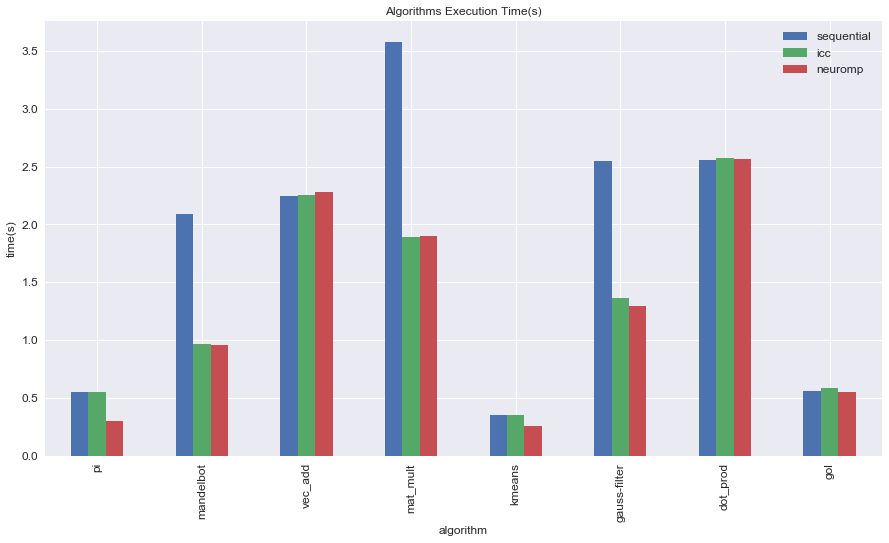

In [62]:
size=12
chart = df[['sequential', 'icc', 'neuromp']].plot(kind='bar', figsize=(15, 8), fontsize=size, title='Algorithms Execution Time(s)')
chart.legend(prop={'size': size})
chart.set_xlabel('algorithm', fontsize=size)
chart.set_ylabel('time(s)', fontsize=size)

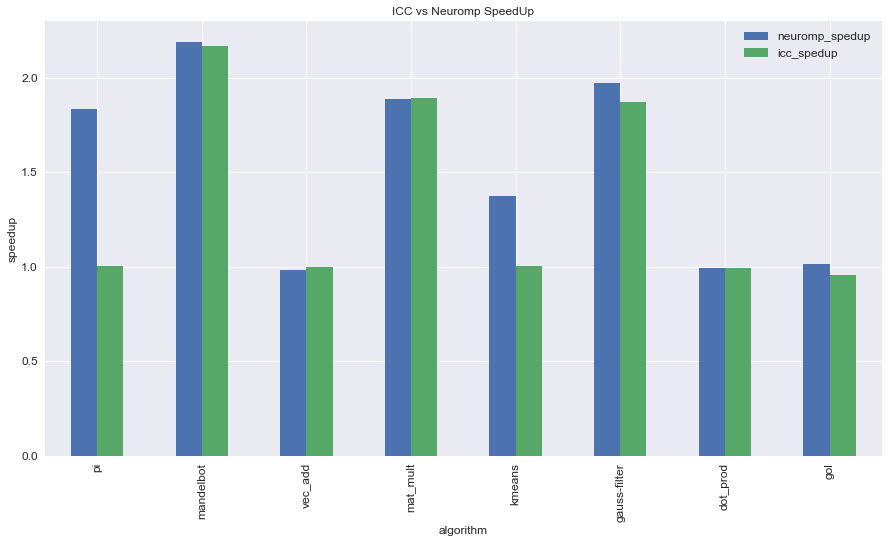

In [61]:
size=12
chart = df[['neuromp_spedup', 'icc_spedup']].plot(kind='bar', figsize=(15, 8), fontsize=size, title='ICC vs Neuromp SpeedUp')
chart.legend(prop={'size': size})
chart.set_xlabel('algorithm', fontsize=size)
chart.set_ylabel('speedup', fontsize=size)

In [59]:
df

,sequential,icc,neuromp,icc_spedup,neuromp_spedup
algorithm,,,,,
pi,0.555,0.552,0.303,1.005435,1.831683
mandelbot,2.090,0.964,0.955,2.168050,2.188482
vec_add,2.247,2.254,2.281,0.996894,0.985094
mat_mult,3.578,1.893,1.898,1.890122,1.885142
kmeans,0.355,0.353,0.258,1.005666,1.375969
gauss-filter,2.549,1.362,1.295,1.871512,1.968340
dot_prod,2.553,2.574,2.566,0.991841,0.994934
gol,0.562,0.586,0.553,0.959044,1.016275
